# Introduction

TLsim is a quasilumped element eigenfrequency solver.

## Polyexponent basis
TLsim uses a "PolyExponent" decomposition for the transmission lines' phase.

$$\Phi(x) = \sum\limits_{i} \alpha_i e^{\beta_i x}x^{k_i}$$
Here $i$ enumerates the basis elements, and $\alpha_i$ are the coefficients and $\beta_i$ and $k_i$ are what defines the basis elements.
It also supports multi-conductor transmission lines.
For example, there is the default basis function, which yields the following real elements:

In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('..')

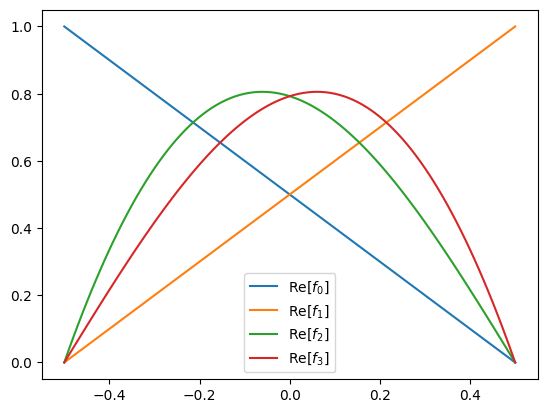

In [3]:
from tlsim2.tl import default_tl_basis
default_basis1 = default_tl_basis(n=1, n_harmonics=1)

fig, axes = plt.subplots(1, 1)
xlist = np.linspace(-0.5, 0.5, 101)
for i, element in enumerate(default_basis1.elements):
    el_y = []
    for x in xlist:
        el_y.append(element.elements[0].eval(x))
    axes.plot(xlist, np.real(el_y), label=f'Re[$f_{i}$]')
axes.legend()

The analytical expression for these functions can be viewed by the string prepesentation:

In [4]:
default_basis1.elements

[TLFieldDistribution with 1 conductors: 0.5   + -1  * x,
 TLFieldDistribution with 1 conductors: 0.5   + 1  * x,
 TLFieldDistribution with 1 conductors: (1.3529177234120247+1.3529177234120278j) * exp(1.5707963267948966j * x)  + (1.3529177234120278-1.3529177234120247j) * exp(-1.5707963267948966j * x)  + (-1.9133145932242195-2.3328705273705865e-15j)   + (3.826629186448439+4.665741054741173e-15j)  * x,
 TLFieldDistribution with 1 conductors: (1.3529177234120247-1.3529177234120278j) * exp(1.5707963267948966j * x)  + (1.3529177234120278+1.3529177234120247j) * exp(-1.5707963267948966j * x)  + (-1.9133145932242195+2.3328705273705865e-15j)   + (-3.826629186448439+4.665741054741173e-15j)  * x]

These functions are designed to be real, but in practice, due to rounding errors, they do have an imaginary part (of the order of 1e-15, which is the rounding error for double-precision floats)
We can add more harmonics to the basis, which would yield the following basis functions:

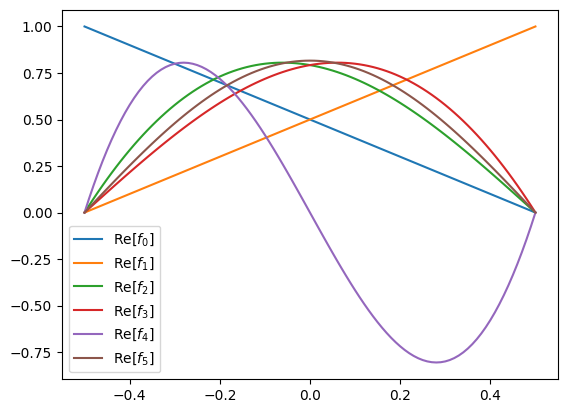

In [5]:
from tlsim2.tl import default_tl_basis
default_basis2 = default_tl_basis(n=1, n_harmonics=2)

fig, axes = plt.subplots(1, 1)
xlist = np.linspace(-0.5, 0.5, 101)
for i, element in enumerate(default_basis2.elements):
    el_y = []
    for x in xlist:
        el_y.append(element.elements[0].eval(x))
    axes.plot(xlist, np.real(el_y), label=f'Re[$f_{i}$]')
axes.legend()

## TL element
To instantise a transmission line, we use the MultiTransmissionLine class. It has as input the per-unit capacitance, inductance and inverse resistance matrices. The resistance is not implemeneted yet. Also it makes in the number of conductors, the length, and the basis.

In [6]:
from tlsim2.tl import MultiTransmissionLine

ll = [[416.120e-9]] # per-unit-length inductance for a 50-ohm TL on cold silicon
cl = [[166.448e-12]] # per-unit-length capacitance for a 50-ohm TL on cold silicon

vp = 1/np.sqrt(np.asarray(cl)*np.asarray(ll))

length = 5e-3

default_basis0 = default_tl_basis(1, 0)
tl = MultiTransmissionLine('TL', n=1, l=length, ll=ll, cl=cl, basis=default_basis0)

The most important property of a quasi-lumped element are its inverse inductance, capacitance and inverse resistance matrices. For our (2-mode, since the basis has just 2 elements) transmission line, we get

In [7]:
li, c, ri = tl.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', ri)

Inverse inductance matrix:
 [[ 4.80630587e+08 -4.80630587e+08]
 [-4.80630587e+08  4.80630587e+08]]
Capacitance matrix:
 [[2.77413333e-13 1.38706667e-13]
 [1.38706667e-13 2.77413333e-13]]
Resistance:
 [[0. 0.]
 [0. 0.]]


The MultiTransmissionLine we have created has just two terminals. The list of terminals an element has can be accessed through .get_terminal_names():

In [8]:
tl.get_terminal_names()

['i0', 'o0']

The amount of terminals in a MultiTransmissionLine is determined by the 'n' parameter:

In [9]:
ll_coupler = [[476.595, 169.262],
              [169.262, 476.595]] # per-unit-length inductance for two close 50-ohm TLs on cold silicon
cl_coupler = [[166.304, -59.062],
              [-59.062, 166.304]] # per-unit-length capacitance for two close 50-ohm TLs on cold silicon

default_basis2 = default_tl_basis(2, 0)
coupler = MultiTransmissionLine('Coupler', n=2, l=length, ll=ll_coupler, cl=cl_coupler, basis=default_basis2)
coupler.get_terminal_names()

['i0', 'o0', 'i1', 'o1']

In [10]:
li, c, ri = coupler.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', ri)

Inverse inductance matrix:
 [[ 0.480213   -0.480213   -0.17054693  0.17054693]
 [-0.480213    0.480213    0.17054693 -0.17054693]
 [-0.17054693  0.17054693  0.480213   -0.480213  ]
 [ 0.17054693 -0.17054693 -0.480213    0.480213  ]]
Capacitance matrix:
 [[ 0.27717333  0.13858667 -0.09843667 -0.04921833]
 [ 0.13858667  0.27717333 -0.04921833 -0.09843667]
 [-0.09843667 -0.04921833  0.27717333  0.13858667]
 [-0.04921833 -0.09843667  0.13858667  0.27717333]]
Resistance:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Circuit object

To obtain eigenfrequencies, we must create a circuit out of this tl.

In [11]:
from tlsim2.circuit import Circuit
sys = Circuit()

To add the TL element to the circuit, we need to define the mapping between element terminals and circuit nodes:

In [12]:
sys.add_element(tl, {'i0': 0, 'o0': 1})

If we wish to set the potential of a node to ground, we use the short function:

In [13]:
sys.short(0)

Now we are ready to see the inverse indutance, capacitance and inverse resistance matrices of the full system:

In [14]:
li_sys, c_sys, ri_sys, nodes = sys.get_system_licri()

In [15]:
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', c)
print('System node order: ', nodes)

Inverse inductance matrix:
 [[ 0.480213   -0.480213   -0.17054693  0.17054693]
 [-0.480213    0.480213    0.17054693 -0.17054693]
 [-0.17054693  0.17054693  0.480213   -0.480213  ]
 [ 0.17054693 -0.17054693 -0.480213    0.480213  ]]
Capacitance matrix:
 [[ 0.27717333  0.13858667 -0.09843667 -0.04921833]
 [ 0.13858667  0.27717333 -0.04921833 -0.09843667]
 [-0.09843667 -0.04921833  0.27717333  0.13858667]
 [-0.04921833 -0.09843667  0.13858667  0.27717333]]
Resistance:
 [[ 0.27717333  0.13858667 -0.09843667 -0.04921833]
 [ 0.13858667  0.27717333 -0.04921833 -0.09843667]
 [-0.09843667 -0.04921833  0.27717333  0.13858667]
 [-0.04921833 -0.09843667  0.13858667  0.27717333]]
System node order:  [1]


The node order defines the correpondes between row/column id in the matrices to circuit node names.

Finally, we can obtain the eigenfrequencies by reducing the ODE system

$$ \begin{pmatrix} \mathbf{0} & \mathbf{C} \\ \mathbf{1} & \mathbf{0} \end{pmatrix}
   \begin{pmatrix} \dot{\mathbf{\Phi}} \\ \dot{\mathbf{V}} \end{pmatrix} = 
   \begin{pmatrix} \mathbf{L}^{-1} & \mathbf{R}^{-1} \\ \mathbf{0} & \mathbf{1} \end{pmatrix}
   \begin{pmatrix} \mathbf{\Phi} \\ \mathbf{V} \end{pmatrix}$$
   
into the generalized eigenvalue problem 

$$ w \begin{pmatrix} \mathbf{0} & \mathbf{C} \\ \mathbf{1} & \mathbf{0} \end{pmatrix}
   \begin{pmatrix} \mathbf{\Phi} \\ \mathbf{V} \end{pmatrix} = 
   \begin{pmatrix} \mathbf{L}^{-1} & \mathbf{R}^{-1} \\ \mathbf{0} & \mathbf{1} \end{pmatrix}
   \begin{pmatrix} \mathbf{\Phi} \\ \mathbf{V} \end{pmatrix}$$
   
and solving it.

In [16]:
w, v, node_names = sys.compute_system_modes()
print ('Eigenfrequencies: ', w)

Eigenfrequencies:  [0.+4.16238298e+10j 0.-4.16238298e+10j]


The angular frequencies are actually the imaginary parts of these values. 
Moreover, each freqeuncy appears twice -- with positive and negative signs. 
Some modes have zero frequency: that means there is a fixed ratio between some nodes' phases.
To get frequncies in GHz, we divide by $2\pi$ and take only positive-frequency eigenvalues.

In [17]:
frequencies = np.imag(w/(2*np.pi)/1e9)
frequencies = frequencies[frequencies > 0]
frequencies

array([6.62463827])

For a quarter-wavelength resonator the correct frequency would be computed by the formula
$$ f = \frac{1}{4l\sqrt{L_lC_l}}$$

In [18]:
frequency_analytical = vp/(4*length)/1e9
frequency_analytical

array([[6.00788234]])

To get higher precision, we might extend the basis:

In [19]:
tl.set_basis(default_tl_basis(n=1, n_harmonics=2))

li, c, ri = tl.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', c)

Inverse inductance matrix:
 [[ 4.80630587e+08 -4.80630587e+08  0.00000000e+00  0.00000000e+00
  -4.26885716e-07  0.00000000e+00]
 [-4.80630587e+08  4.80630587e+08  0.00000000e+00  0.00000000e+00
   4.26885716e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.64476517e+09  1.51035000e+09
   6.64344933e+08  1.57257285e+09]
 [ 0.00000000e+00  0.00000000e+00  1.51035000e+09  1.64476517e+09
  -6.64344933e+08  1.57257285e+09]
 [-4.26885716e-07  4.26885716e-07  6.64344933e+08 -6.64344933e+08
   6.57906067e+09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.57257285e+09  1.57257285e+09
   0.00000000e+00  1.58121125e+09]]
Capacitance matrix:
 [[ 2.77413333e-13  1.38706667e-13  2.29141748e-13  2.05947672e-13
   1.14570874e-13  2.16298289e-13]
 [ 1.38706667e-13  2.77413333e-13  2.05947672e-13  2.29141748e-13
  -1.14570874e-13  2.16298289e-13]
 [ 2.29141748e-13  2.05947672e-13  2.77413333e-13  2.71839357e-13
   2.77999139e-14  2.75897781e-13]
 [ 2.05947672e-13  2.29141748e-13  2.7183

Now there are many more elements, let's see what frequency we get...

In [20]:
w, v, node_names = sys.compute_system_modes()
frequencies = np.imag(w/(2*np.pi))/1e9
frequencies = frequencies[frequencies > 0]
frequencies

array([87.24957035, 46.02663274, 30.27585813, 18.02444898,  6.00788234])

In [21]:
closest_frequency = frequencies[np.argmin(np.abs(frequencies - frequency_analytical))]
closest_frequency - frequency_analytical

array([[6.21724894e-15]])

The error is very low, which might be related to the fact that this basis actually contains precisely the right basis element.

In [43]:
li, c, ri = tl.get_element_licri()
li1 = li[0, :]
li2 = li[:, 0]
c1 = c[0, :]
c2 = c[:, 0]
c1, c2

(array([2.77413333e-13, 1.38706667e-13, 2.29141748e-13, 2.05947672e-13,
        1.14570874e-13, 2.16298289e-13]),
 array([2.77413333e-13, 1.38706667e-13, 2.29141748e-13, 2.05947672e-13,
        1.14570874e-13, 2.16298289e-13]))

## Creating a circuit element out of a ready circuit
Now that we have created our fancy nice resonator circuit and computed its modes, we can put it into a larger circuit -- leaving only the relevant modes. In this function the relevant modes are chose by a frequency span (in angular units). We choose the span to be up to 10 GHz.

Node 1 of the resonator circuit is now assigned the terminal name 'res_open'.

In [23]:
cutoff_high = 10e9*(2*np.pi)
res = sys.make_element({1: 'res_open'}, cutoff_low = 0, cutoff_high = cutoff_high)
li, c, ri = res.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', c)

Inverse inductance matrix:
 [[ 4.80630587e+08+0.j -6.73995350e-19+0.j]
 [-6.73995350e-19+0.j  9.91837772e+07+0.j]]
Capacitance matrix:
 [[2.77413333e-13+0.j 5.62694400e-14+0.j]
 [5.62694400e-14+0.j 1.67287725e-14+0.j]]
Resistance:
 [[2.77413333e-13+0.j 5.62694400e-14+0.j]
 [5.62694400e-14+0.j 1.67287725e-14+0.j]]


Now we create a bigger circuit, consisting of this resonator

In [24]:
sys_big = Circuit()
sys_big.add_element(res, {'res_open': 1})


and some lumped elements: a microwave port through a small capacitance.

In [25]:
from tlsim2.lumped import LumpedTwoTerminal

c_c = 1e-16
r = 50

cap = LumpedTwoTerminal(name='C_c', c=c_c)
resistor = LumpedTwoTerminal(name='R', r=r)

sys_big.add_element(cap, {'i': 1, 'o': 2})
sys_big.add_element(resistor, {'i': 2, 'o': 0})

sys_big.short(0)

In [26]:
w, v, node_names = sys_big.compute_system_modes()
frequencies = np.imag(w/(2*np.pi))/1e9
decays = np.real(w/1e9)*2
decays = decays[frequencies > 0]
frequencies = frequencies[frequencies > 0]
frequencies, decays

(array([2.21061197e-11, 2.39620153e+01, 6.00716054e+00]),
 array([4.00453805e+05, 1.01204180e-04, 1.71158032e-06]))

The approximate analytical formula for this frequency is 
$$ \gamma = 2C_c^2\omega^3 Z_0 R$$

In [27]:
2 * c_c**2 * (closest_frequency * 2 * np.pi * 1e9)**3*(r * 50)/(np.pi/2)/1e9

1.7121980139125054e-06

In [29]:
sys_big.get_system_licri()

(array([[ 4.80630587e+08+0.j,  0.00000000e+00+0.j, -6.73995350e-19+0.j],
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
        [-6.73995350e-19+0.j,  0.00000000e+00+0.j,  9.91837772e+07+0.j]]),
 array([[ 2.77513333e-13+0.j, -1.00000000e-16+0.j,  5.62694400e-14+0.j],
        [-1.00000000e-16+0.j,  1.00000000e-16+0.j,  0.00000000e+00+0.j],
        [ 5.62694400e-14+0.j,  0.00000000e+00+0.j,  1.67287725e-14+0.j]]),
 array([[0.  +0.j, 0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.02+0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j]]),
 [1, 2, 'None_0_disconnected'])

# Splitting circuit elements

In [30]:
from tlsim2.linear import SplitElementPart
cii = SplitElementPart('Cii', cap, 'i', 'i')
cio = SplitElementPart('Cio', cap, 'i', 'o')
coo = SplitElementPart('Coo', cap, 'o', 'o')

In [31]:
cio.get_element_licri()

(array([[ 0., -0.],
        [-0.,  0.]]),
 array([[ 0.e+00, -1.e-16],
        [-1.e-16,  0.e+00]]),
 array([[ 0., -0.],
        [-0.,  0.]]))

In [32]:
default_basis2 = default_tl_basis(2, 2)
default_basis2

LinearHull with 12 elements:
[TLFieldDistribution with 2 conductors: 0.5   + -1  * x
, TLFieldDistribution with 2 conductors: 0.5   + 1  * x
, TLFieldDistribution with 2 conductors: 
0.5   + -1  * x, TLFieldDistribution with 2 conductors: 
0.5   + 1  * x, TLFieldDistribution with 2 conductors: (1.3529177234120247+1.3529177234120278j) * exp(1.5707963267948966j * x)  + (1.3529177234120278-1.3529177234120247j) * exp(-1.5707963267948966j * x)  + (-1.9133145932242195-2.3328705273705865e-15j)   + (3.826629186448439+4.665741054741173e-15j)  * x
, TLFieldDistribution with 2 conductors: (1.3529177234120247-1.3529177234120278j) * exp(1.5707963267948966j * x)  + (1.3529177234120278+1.3529177234120247j) * exp(-1.5707963267948966j * x)  + (-1.9133145932242195+2.3328705273705865e-15j)   + (-3.826629186448439+4.665741054741173e-15j)  * x
, TLFieldDistribution with 2 conductors: 1.9133145932242095j * exp(3.141592653589793j * x)  + -1.9133145932242095j * exp(-3.141592653589793j * x)  + (7.6532583728968

# Nonlinearity

$$ \hat{V} =  $$

In [70]:
coupler.get_element_licri(), coupler.get_terminal_names()
coupler.set_basis(default_tl_basis(n=2, n_harmonics=2))

C:\Users\ilya.besedin\AppData\Local\Temp\ipykernel_9652\1442646396.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.log10(np.abs(c)))


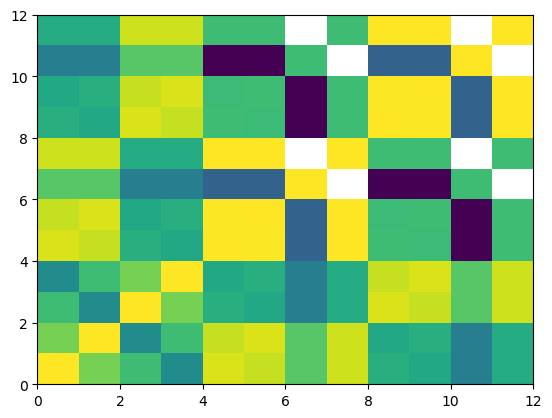

In [74]:
li, c, ri = coupler.get_element_licri()
plt.pcolormesh(np.log10(np.abs(c)))